**SOS Coding Topic B LabelSOM**

Luca Marius Cobzaru: 11712226  
Valentin Hrusa: 11808205  
Github Repo: https://github.com/mirvariates/PySOMVis-sos-ass3

For the exercise we went with option A) and aggregated variance, mean and combined values of the units.  
At first we will present and explain the logic behind our implementation after which we demonstrate it on the somtoolbox pre-trained weights for chainlink and 10clusters. 
We discuss the implications that can be drawn from these visualizations followed by the training of our own SOMs on the input vectors of these datasets. We compare their quantitative error and visualize them as well.


In [1227]:
import numpy as np
import pandas as pdcoding
import gzip
from SOMToolBox_Parse import SOMToolBox_Parse
idata = SOMToolBox_Parse("datasets\\chainlink\\chainlink.vec").read_weight_file()
weights = SOMToolBox_Parse("datasets\\chainlink\\chainlink.wgt.gz").read_weight_file()
label_names = SOMToolBox_Parse("datasets\\chainlink\\chainlink.tv").read_template_vec_file()

In [1228]:
# given HitHistogram implementation 
def HitHist(_m, _n, _weights, _idata):
    hist = np.zeros(_m * _n)
    for vector in _idata:
        position = np.argmin(np.sqrt(np.sum(np.power(_weights - vector, 2), axis=1)))
        hist[position] += 1

    return hist.reshape(_m, _n)

To begin we need a dataset which assignes all input-vectors to their winning unit. This functionality is implemented in *vectorsPerUnit* and deploys the same distance metric as the given *HitHist* function.  
To test that our gathering of vectors is correct we can compare it to the very similar HitHistogram visualization.
If *vectorsPerUnit* can generate the exact same histogram as *HitHist*, we know that every unit has a correct amount of input vectors alloted.

In [1229]:
#fills a library with every input vector mapped to their closest unit
def vectorsPerUnit(_weights, _idata):
    vectors_per_unit = {}
    for vector in _idata:
        position = np.argmin(np.sqrt(np.sum(np.power(_weights - vector, 2), axis=1)))
        if position not in vectors_per_unit:
            vectors_per_unit[position] = []
        vectors_per_unit[position].append(vector)
    return vectors_per_unit

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
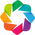

:Layout
   .Image.HitHist              :Image   [x,y]   (z)
   .Image.HitHist_with_library :Image   [x,y]   (z)

In [1230]:
import panel as pn
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
hithist = hv.Image(HitHist(weights['ydim'], weights['xdim'], weights['arr'], idata['arr'])).opts(xaxis=None, yaxis=None)

matrix = np.zeros(weights['ydim'] * weights['xdim'])
for unit, vectors in vectorsPerUnit(weights['arr'], idata['arr']).items():
    matrix[unit] = len(vectors)

hithist_with_library = hv.Image(matrix.reshape(weights['ydim'], weights['xdim'])).opts(xaxis=None, yaxis=None)

hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), hithist_with_library.relabel('HitHist with library').opts(cmap='kr')])

This little experiment proves that the vectorsPerUnit-method collects the right amount of input vectors for every unit. Since we use the exact same distance metric as HitHist, we can conclude that the vectors are the correct ones and there is no swapping of vectors between units. 

The main computational task of our assignment is the calculation of variance, mean and combined-value for every unit. The calculation for one singular unit is implemented in *computeValuesPerVectors*, which takes as its input all vectors of that unit and calculates the values for the specific labels. Every label will have one entry in each vector.  
To test this functionality we generate 3 random arrays, calculate the variance, mean and combined values for all values at the same index and compare with the return value of our function.   

In [1231]:
#computes variances, means and combined-values for every label of a given list of input vectors
def computeValuesPerVectors(vectors, varWeight=0.5, meanWeight=0.5, labels=label_names):
    if varWeight > 1 or meanWeight > 1 or varWeight < 0 or meanWeight < 0 or (varWeight+meanWeight) != 1:
        raise ValueError('the relative weights for combined variance and mean must both not be greater than 1, not be less than 0 and their sum must be equal to 1')

    variances = np.zeros(len(labels))
    means = np.zeros(len(labels))
    combineds = np.zeros(len(labels))
    for label in labels:
        values = np.zeros(len(vectors))
        mean = 0
        for vector_index, vector in enumerate(vectors):
            values[vector_index] = vector[label]
            mean += vector[label]
        mean /= len(vectors)
        variance = np.sum(np.power(values - mean, 2))/len(vectors)
        variances[label] = variance
        means[label] = mean
        combineds[label] = (variance * varWeight) + (mean * meanWeight)

    return (variances, means, combineds)

In [1232]:
testdata1 = np.random.rand(100)
testdata2 = np.random.rand(100)
testdata3 = np.random.rand(100)
(variances, means, combineds) = computeValuesPerVectors([testdata1, testdata2, testdata3], varWeight=0.25, meanWeight=0.75, labels=np.arange(0,100))
for i in range(0,100):
    var = np.array([testdata1[i], testdata2[i], testdata3[i]]).var()
    mean = np.array([testdata1[i], testdata2[i], testdata3[i]]).mean()
    assert(var == variances[i])
    assert(mean == means[i])
    assert((var*0.25) + (mean*0.75) == combineds[i])

try:
    computeValuesPerVectors([testdata1, testdata2, testdata3], varWeight=0.25, meanWeight=0.25, labels=np.arange(0,100))
except ValueError as e:
    assert(str(e) == 'the relative weights for combined variance and mean must both not be greater than 1, not be less than 0 and their sum must be equal to 1')
else:
    raise AssertionError('ValueError was not raised!')


For the next two cells we splice values from lists that cross a specified threshold. This functionality is needed for the threshold-option that is required to implement. As input these functions get the indices of sorted variance and mean values and the respective value arrays. This means as long as we are splicing the index vector from the correct side (left or right) we do not need to worry about if we are destroying the ordering of our final values. This is important since we want variance to be sorted from lowest to highest and mean to be sorted from highest to lowest.  
To test this functionality we generate sorted index and value arrays, call the splicing functions and make sure the correct amount of data is removed and in correct order.

In [1233]:
def spliceMeanValueList(indices, values, meanThreshold=-np.inf):
    withinThreshold = len(values[values >= meanThreshold])
    if withinThreshold == 0:
        indices = []
    else:
        indices = indices[-withinThreshold:]
    return (indices, values)

In [1234]:
def spliceVarValueList(indices, values, varThreshold=np.inf):
    withinThreshold = len(values[values <= varThreshold])
    indices = indices[:withinThreshold]
    return (indices, values)

In [1235]:
values = np.arange(100, 300)
indices = np.arange(0, 200)
assert(len(spliceMeanValueList(indices, values)[0]) == 200) #no threshold
assert(len(spliceVarValueList(indices, values)[0]) == 200) #no threshold
assert(len(spliceMeanValueList(indices, values, 200)[0]) == 100) #all indices of values >= 200
assert(len(spliceVarValueList(indices, values, 199)[0]) == 100) #all indices of values <= 199
assert(np.all(values[spliceMeanValueList(indices, values, 200)[0]] == values[100:])) #equality and correct order of remaining values
assert(np.all(values[spliceVarValueList(indices, values, 199)[0]] == values[:100])) #equality and correct order of remaining values

In the next cell *stringVectors* the actual strings that are to be printed onto the units are computed. Followed by the *printSomLabels* in the next cell which generates the final plot. The methods are annotated with comments to explain functionality.

In [1236]:
#computes three string matrices. One for variance, one for mean and one for combined-values according to the user input parameters
def stringVectors(_m, _n, _weights, _idata, varThreshold=np.inf, meanThreshold=-np.inf, combUpperThreshold=np.inf, combLowerThreshold=-np.inf, varWeight=0.5, meanWeight=0.5,
                   maxNumLabels=1, printValues=True, label_names=label_names):    
    varMatrix = np.full(_m * _n, '-', dtype=object)
    meanMatrix = np.full(_m * _n, '-', dtype=object)
    combMatrix = np.full(_m * _n, '-', dtype=object)

    if maxNumLabels > len(label_names):
        maxNumLabels = len(label_names)

    if maxNumLabels <= 0:
        raise ValueError('the maximum allowed number of labels to print is set to below 1')

    #sort all input vectors to their respecive unit
    vectors_per_unit = vectorsPerUnit(_weights, _idata)

    for unit in range(_m*_n):
        if unit in vectors_per_unit:
            (variances, means, combineds) = computeValuesPerVectors(vectors_per_unit[unit], varWeight, meanWeight, labels=label_names)

            #for variances we want the lowest value, so we need to sort and then take only as many as requested from the left side since they are sorted ascending
            lowest_vars_indices = np.argsort(variances)[:maxNumLabels]
            #we need the actual values to sort out additional variances that cross the threshold
            lowest_vars_values = variances[lowest_vars_indices]

            #for means we want the highest value, so we need to sort and then take only as many as requested from the right side
            highest_means_indices = np.argsort(means)[-maxNumLabels:]
            #we need the actual values to sort out additional variances that cross the threshold
            highest_means_values = means[highest_means_indices]
            
            #for the combined value we don't need to sort since it is not specified whether high or low values are wanted, we instead use an extensive threshold option
            eligible_combined_indices = np.where((combineds >= combLowerThreshold) & (combineds <= combUpperThreshold))[0]
            eligible_combined_indices = eligible_combined_indices[:maxNumLabels]

            #now eliminate as many labels as thresholds are crossed, this works because lists are sorted
            (lowest_vars_indices, lowest_vars_values) = spliceVarValueList(lowest_vars_indices, lowest_vars_values, varThreshold)
            (highest_means_indices, highest_means_values) = spliceMeanValueList(highest_means_indices, highest_means_values, meanThreshold)

            #traverse final index vectors and generate strings
            var_string = ""
            if len(lowest_vars_indices) > 0:
                for index in lowest_vars_indices:
                    var_string += label_names[index]
                    if printValues:
                        var_string += ": " + str(round(variances[index], 4))
                    var_string += "\n"
                varMatrix[unit] = var_string[:-1]

            mean_string = ""
            if len(highest_means_indices) > 0:
                for index in reversed(highest_means_indices):
                    mean_string += label_names[index]
                    if printValues:
                        mean_string += ": " + str(round(means[index], 4))
                    mean_string += "\n"
                meanMatrix[unit] = mean_string[:-1]

            comb_string = ""
            if len(eligible_combined_indices) > 0:
                for index in eligible_combined_indices:
                    comb_string += label_names[index]
                    if printValues:
                        comb_string += ": " + str(round(combineds[index], 4))
                    comb_string += "\n"
                combMatrix[unit] = comb_string[:-1]

    return (varMatrix, meanMatrix, combMatrix)
                


In [1237]:
#setting up the environment for image generation
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# generates an image where the labels of up to 3 vectors can be plotted
# the vectors then are displayed differently by changing their style with mathbf and mathit, which does not require laTex to be installed
def printSomLabels(vector, dimensions, labels, vector2=None, vector3=None, fig_size=[14, 18], font_size=8, aspect=None):
    # count the maximum number of new lines in all cells, summed across all vectors
    # this is used to change the aspect of the image unless otherwise specified 
    max_newlines = max(item[0].count("\n") + 1 for item in vector)
    if vector2 is not None:
        max_newlines += max(item[0].count("\n") + 1 for item in vector2)
    if vector3 is not None:
        max_newlines += max(item[0].count("\n") + 1 for item in vector3)
    
    # set figure dimensions
    plt.figure(figsize=fig_size)
    ax = plt.gca()

    # iterate over all provided vectors by the dimensions specified such that rows and colums are generated
    for i in range(dimensions[1]):
        for j in range(dimensions[0]):
            x = j
            y = dimensions[1] - i - 1  #invert for proper plotting
            idx = j + (i * dimensions[0]) 

            #add rectangle for each cell
            rect = Rectangle((x - 0.5, y - 0.5), 1, 1, linewidth=1, edgecolor="black", facecolor="none")
            ax.add_patch(rect)

            # just insert the provided labels of the first vector
            if vector2 is None:
                plt.text(x, y, vector[idx], fontsize=font_size, ha="center", va="center", color="black")
            # if only two vectors are provided, insert the labels of the second vector below in a different style by adding mathbf below it
            # this has to be done for every line of the second vector otherwise it doesn't work
            elif vector3 is None:
                math_str = "\n"
                if vector2[idx] != "-" or vector[idx] != "-":
                    for vec2str in vector2[idx].splitlines():
                        if vector2[idx] == "-":
                            math_str += "\n-"
                        else:
                            math_str += f"\n$\\mathbf{{{vec2str.replace(" ", "\\ ").replace("_", "\\_")}}}$"
                plt.text(x, y, (vector[idx] + math_str), fontsize=font_size, ha="center", va="center", color="black")
            # if all three vectors are provided, do the same as above with the second vector, and also do it similarly for vector3 (with mathit)
            else:
                math2_str = "\n"
                if vector2[idx] != "-" or vector[idx] != "-":
                    for vec2str in vector2[idx].splitlines():
                        if vector2[idx] == "-":
                            math2_str += "\n-"
                        else:
                            math2_str += f"\n$\\mathbf{{{vec2str.replace(" ", "\\ ").replace("_", "\\_")}}}$"

                math3_str =  "\n"
                if vector3[idx] != "-" or vector2[idx] != "-" or vector[idx] != "-":
                    for vec3str in vector3[idx].splitlines():
                        if vector3[idx] == "-":
                            math3_str += "\n-"
                        else:
                            math3_str += f"\n$\\mathit{{{vec3str.replace(" ", "\\ ").replace("_", "\\_")}}}$"
                plt.text(x, y, (vector[idx] + math2_str + math3_str), fontsize=font_size, ha="center", va="center", color="black")

    plt.xlim(-0.5, dimensions[0] - 0.5)
    plt.ylim(-0.5, dimensions[1] - 0.5)
    plt.xticks(range(dimensions[0]), [])  #Remove ticks
    plt.yticks(range(dimensions[1]), [])
    plt.title(', '.join(labels), fontsize=14)
    #set the aspect with max_newlines if the aspect was not provided
    if aspect is None:
        plt.gca().set_aspect(1 + (0.12 * max_newlines))
    else:
        plt.gca().set_aspect(aspect)
    # show image
    plt.plot()
    plt.show()

So with all the logic needed for the LabelSom implemented, we can start with the visulizations of the pre-trained datasets.
For the first dataset we go with chainlink.
To demonstrate we use all three available values and print every possible label: on the top of every unit we see labels with lowest variance, in bold we see the labels with highest mean and on the bottom we can see the combined value with the relative weights both being set to $0.5$. This dataset has 3 labels: 'comp_1', 'comp_2' and 'comp_3' symbolising the 3-dimensional position of an input-vector.
Since we aggregate unit-wise the plots have stark similarity with the hit-histogram. One can even infer the units with that could just capture a single input vector: because on these units the variance of the labels are 0.0. This implies only one input-vector, since the vectors are taken from a coordinate-system where no 2 same points can be listed and since variance is only 0 when the values are exactly equal, there can maximally be one such vector for this unit. Looking back at the hit-histogram for chainlink it is confirmed, that the units where variance is 0 are indeed units where only one vector was mapped onto.

Another interesting observation we can make from the label-listing comes from the highest mean-values. When observing the change in the label with the highest mean there is a noticable small continual change along the units. There is never erratic change of mean values or a promotion from the lowest ranked label onto the highest ranked label in the neighboring unit. This, paired with very low variance values suggests that the input-vectors are following a continuous curve like function. When you follow this trend to a cut part of the ring, you can even see the trend pick back up on other cut part of the ring. This means the som can indeed very well represent the underlying data even though there had to be a cut from the 3-dimensional representation into the 2-dimensional one.    


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
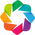

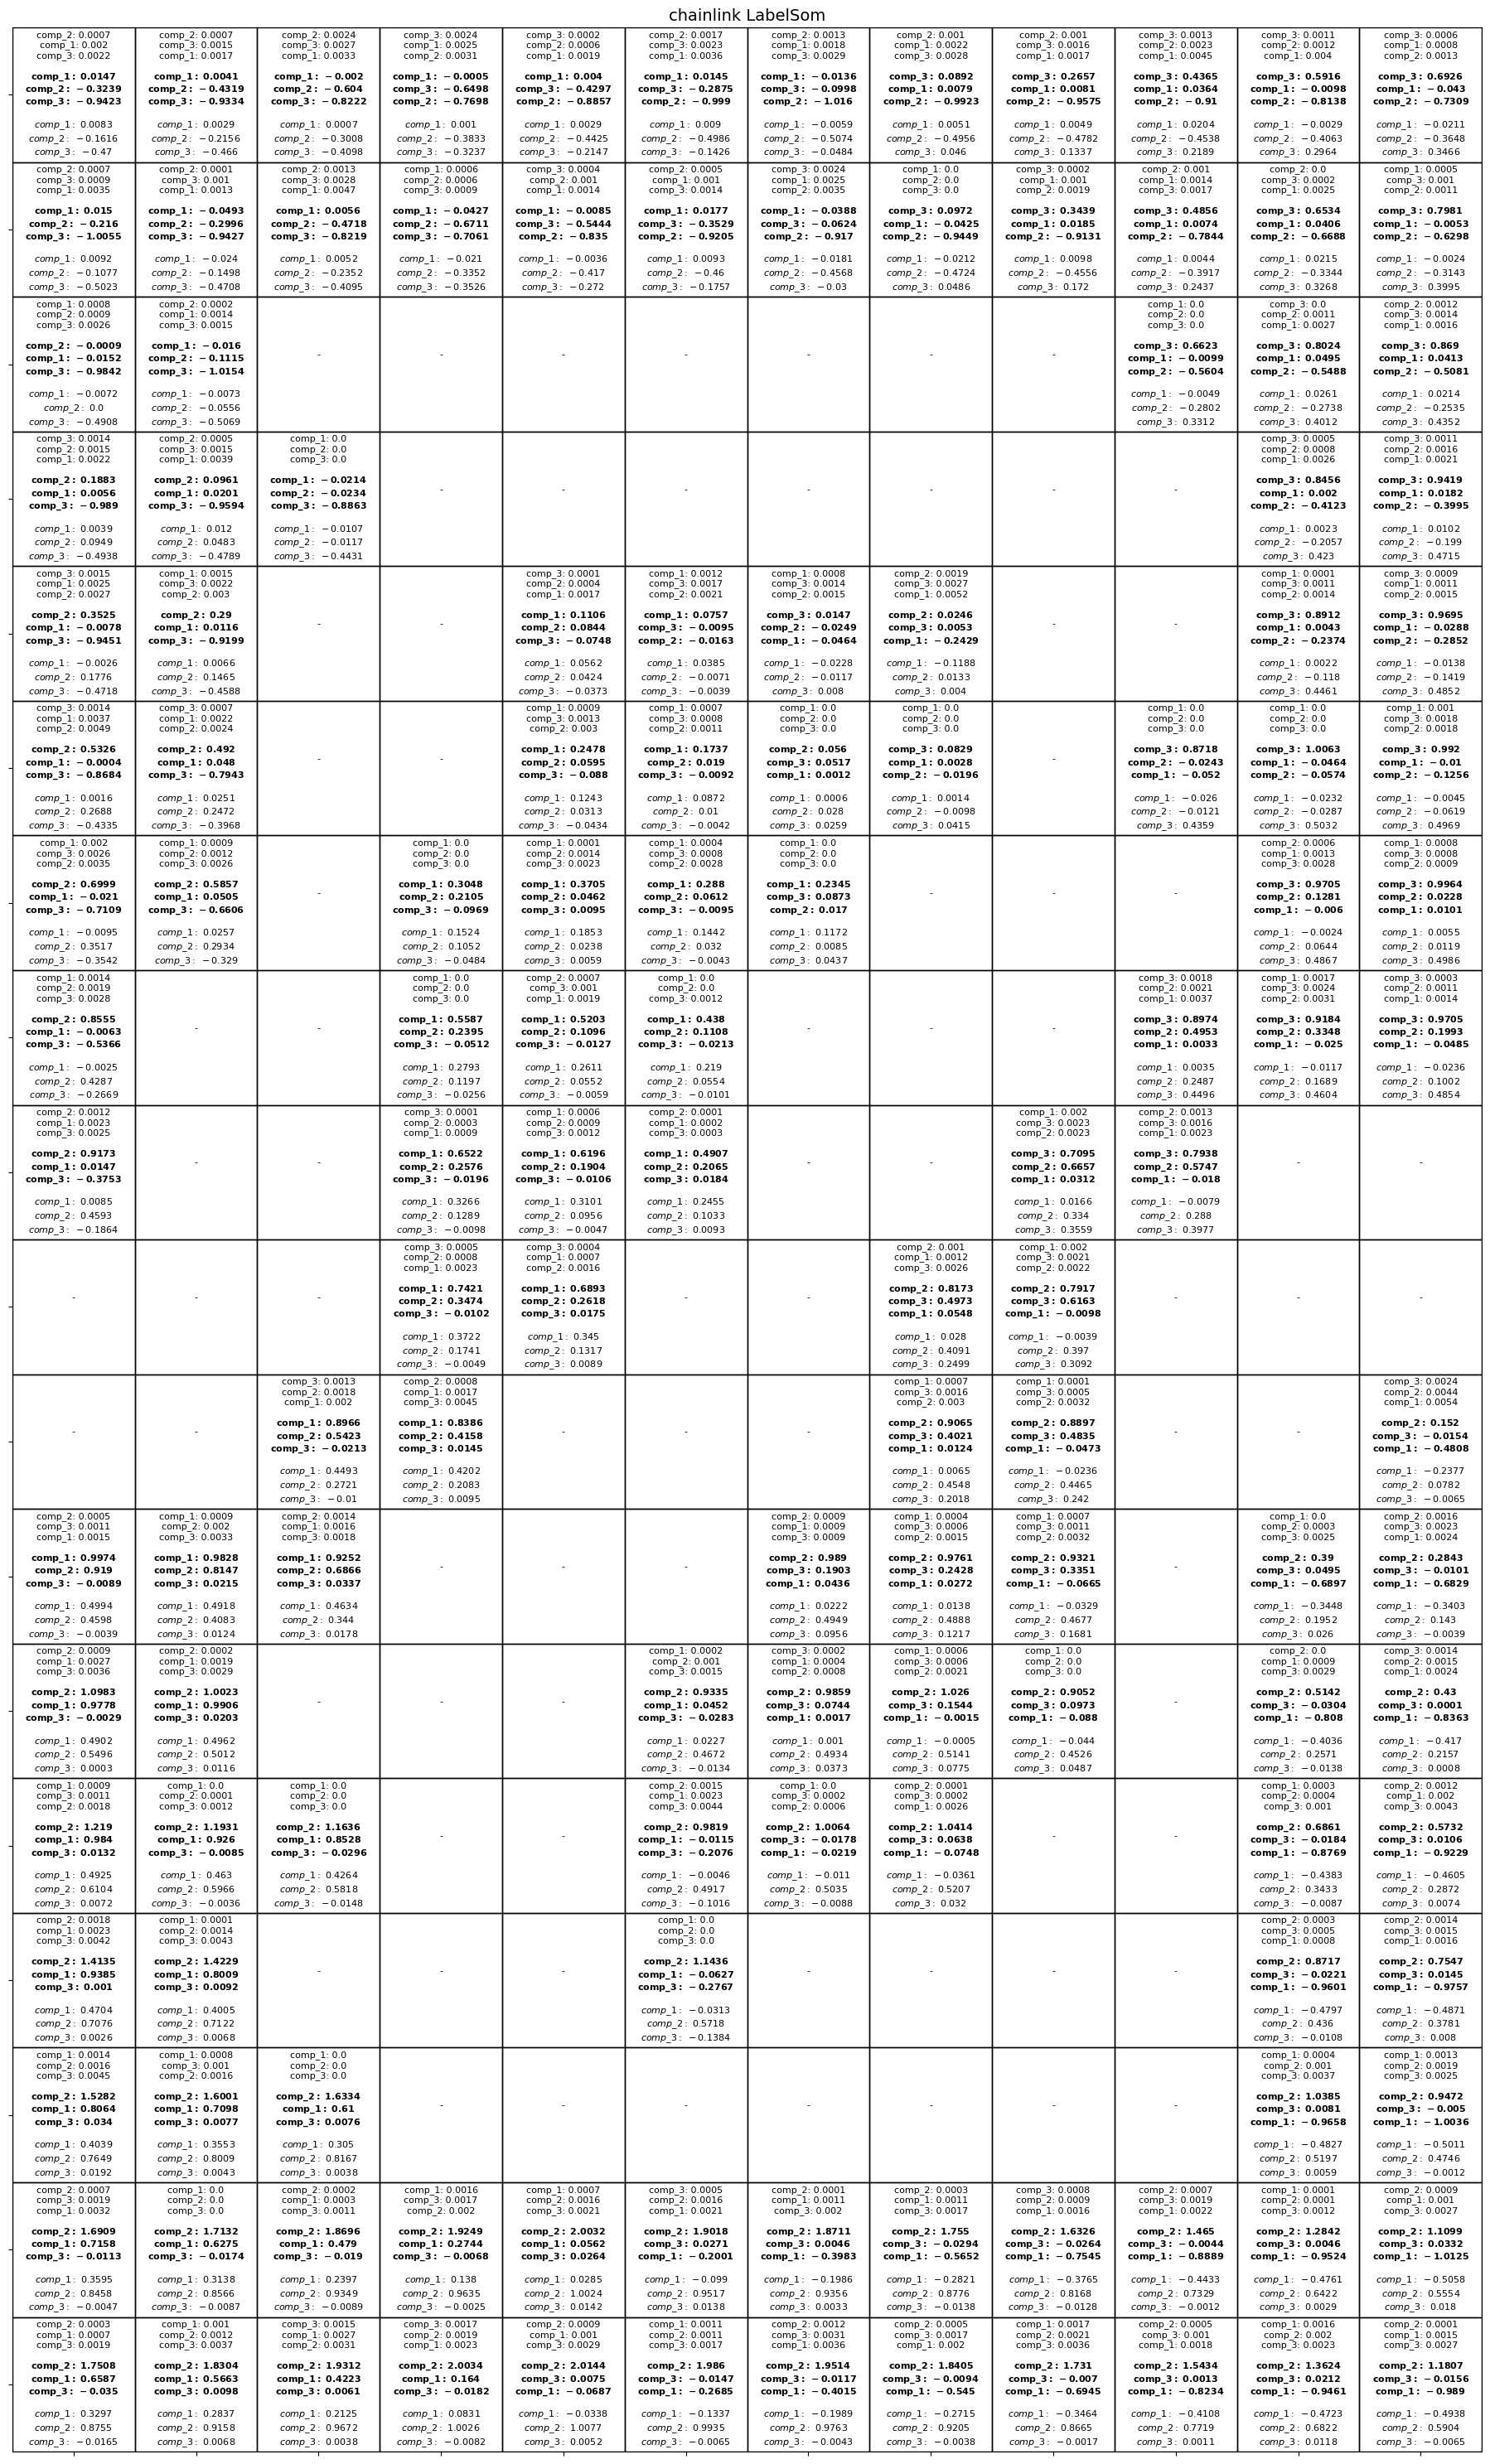

In [1245]:
import panel as pn
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

ydim = weights['ydim']
xdim = weights['xdim']
(variance,mean,combined) = stringVectors(ydim, xdim, weights['arr'], idata['arr'], printValues=True, maxNumLabels=3)
printSomLabels(variance, [xdim, ydim], ["chainlink LabelSom"], mean, combined, [34,38], 8, 1.1)

The next dataset is the pre-trained 10clusters. This dataset represents 10 clusters with their points being represented in 10 dimensions. For easier readability we draw 5 labels with their lowest variance values on top and their highest mean values in bold.

The 10 different clusters are neatly arranged with a very broad seeming cluster on the top left and all the other clusters separated by at least one no-winner unit.
But is it really a broad cluster? Soms have a tendency to be drawn to regions with a high frequency of vectors, so it could be the possibility, that the cluster on the top-left just has a way higher cardinality. To make sure the LabelSom can help: First off, we notice stagnation on the mean-values in the top-left cluster, they definitely do not change in a continual way like the chainlink points were observed to do. This fact now coupled with the very high variance values suggests that the values are, in fact, distributed on a broader scale than with the other clusters. In comparison the other clusters have significantly lower variance values (they are not all 0 plotted with 10 labels you can see that some variance exists).
In a nutshell the LabelSom confirmes a broader distributed cluster on the top-left and more narrowly distributed points in the other clusters.

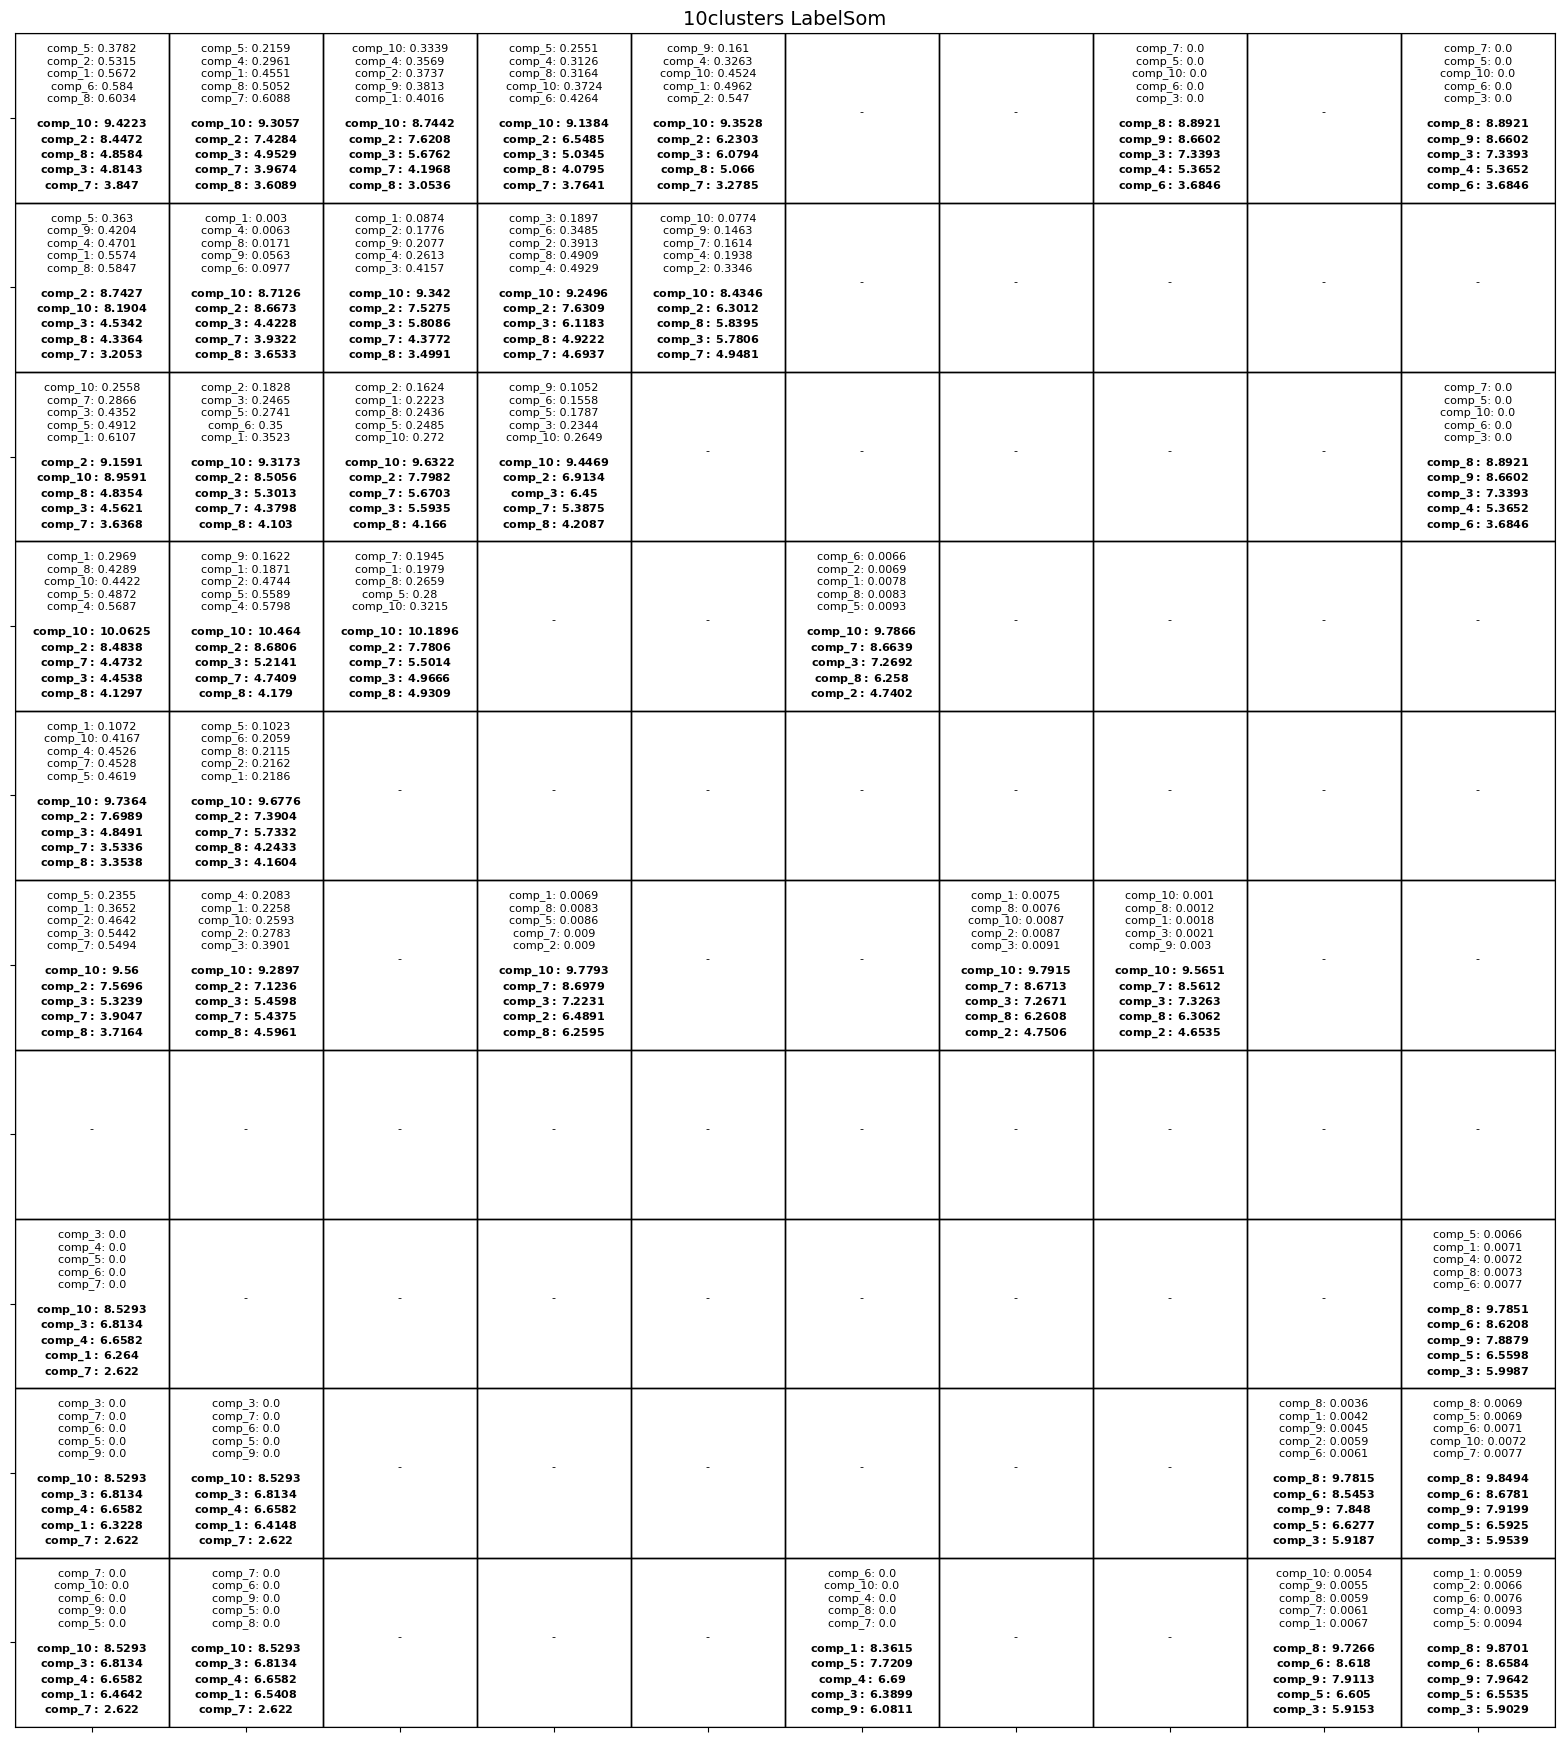

In [ ]:
#read 10clusters data
idata = SOMToolBox_Parse("datasets\\10clusters\\10clusters.vec").read_weight_file()
weights = SOMToolBox_Parse("datasets\\10clusters\\10clusters.wgt.gz").read_weight_file()
label_names = SOMToolBox_Parse("datasets\\10clusters\\10clusters.tv").read_template_vec_file()

ydim = weights['ydim']
xdim = weights['xdim']
(variance,mean,combined) = stringVectors(ydim, xdim, weights['arr'], idata['arr'], printValues=True, maxNumLabels=5, label_names=label_names)
printSomLabels(variance, [xdim, ydim], ["10clusters LabelSom"],fig_size=[28,22], font_size=8, aspect=1.1, vector2=mean)

**Training our own SOMs with suitable parameters**

the suitable parameters were found by iterating multiple times over different values of sigma (neighborhood radius), learning_rate
and training the Soms with them. Their respective quantization errors were then looked at and the parameters that resulted 
in the best (lowest) values were chosen as their most suitable parameters. The parameters and the resulting quantitative error rate is printed,
and the soms are trained on them.

In [ ]:
from SOMToolBox_Parse import SOMToolBox_Parse
from minisom import MiniSom 
import math
idata = SOMToolBox_Parse("datasets\\10clusters\\10clusters.vec").read_weight_file()

som_10_cluster_10_10 = MiniSom(10, 10, 10, sigma=1, learning_rate=0.7)
som_10_cluster_10_10.train(idata['arr'], 10000)
print('10_cluster, 10 10')
print('neighborhood radius: ', 1, ' learning rate: ', 0.7)
print('QUANTERROR_UNIT_AVG: ', (som_10_cluster_10_10.quantization_error(idata['arr'])))
print()

som_10_cluster_100_60 = MiniSom(100, 60, 10, sigma=2.5, learning_rate=3.8)
som_10_cluster_100_60.train(idata['arr'], 10000)
print('10_cluster, 100 60')
print('neighborhood radius: ', 2.5, ' learning rate: ', 3.8)
print('QUANTERROR_UNIT_AVG: ', (som_10_cluster_100_60.quantization_error(idata['arr'])))
print()


idata = SOMToolBox_Parse("datasets\\chainlink\\chainlink.vec").read_weight_file()

som_chainlink_10_10 = MiniSom(10, 10, 3, sigma=1.0, learning_rate=0.4)
som_chainlink_10_10.train(idata['arr'], 10000)
print('chainlink, 10 10')
print('neighborhood radius: ', 1.0, ' learning rate: ', 0.4)
print('QUANTERROR_UNIT_AVG: ', (som_chainlink_10_10.quantization_error(idata['arr'])))
print()

som_chainlink_100_60 = MiniSom(100, 60, 3, sigma=1.9, learning_rate=3.4)
som_chainlink_100_60.train(idata['arr'], 10000)
print('chainlink, 100 60')
print('neighborhood radius: ', 1.9, ' learning rate: ', 3.4)
print('QUANTERROR_UNIT_AVG: ', (som_chainlink_100_60.quantization_error(idata['arr'])))
print()

10_cluster, 10 10
neighborhood radius:  2.5  learning rate:  3.8  best value: 0.605
QUANTERROR_UNIT_AVG:  0.602397007750964

10_cluster, 100 60
neighborhood radius:  2.5  learning rate:  3.8  best value: 0.02
QUANTERROR_UNIT_AVG:  0.08821852716269102

chainlink, 10 10
neighborhood radius:  1.0  learning rate:  0.4  best value: 0.0396
QUANTERROR_UNIT_AVG:  0.07669676743020698

chainlink, 100 60
neighborhood radius:  1.9  learning rate:  3.4  best value: 0.0014
QUANTERROR_UNIT_AVG:  0.0017465259036888966



The last two cells print the small self trained soms, with the first cell showing the lowest variance and the second cell showing lowest variance and highest mean. Although significantly different from the pre-trained visualizations, we can indeed notice the structures discussed in the first two visualiaztions.  
The 10cluster visualization exhibits high variance in the broader left cluster and very low variance in the rest, while the chainlink visualization is defined by low variance and a, less noticable but still present, continual shift in the mean values. It also seems like our som did not properly break the chains however this som is also significantly smaller than the pre-trained one.  

We must refrain from printing the 100x60 soms since the strings can not properly be printed on such a large grid. 

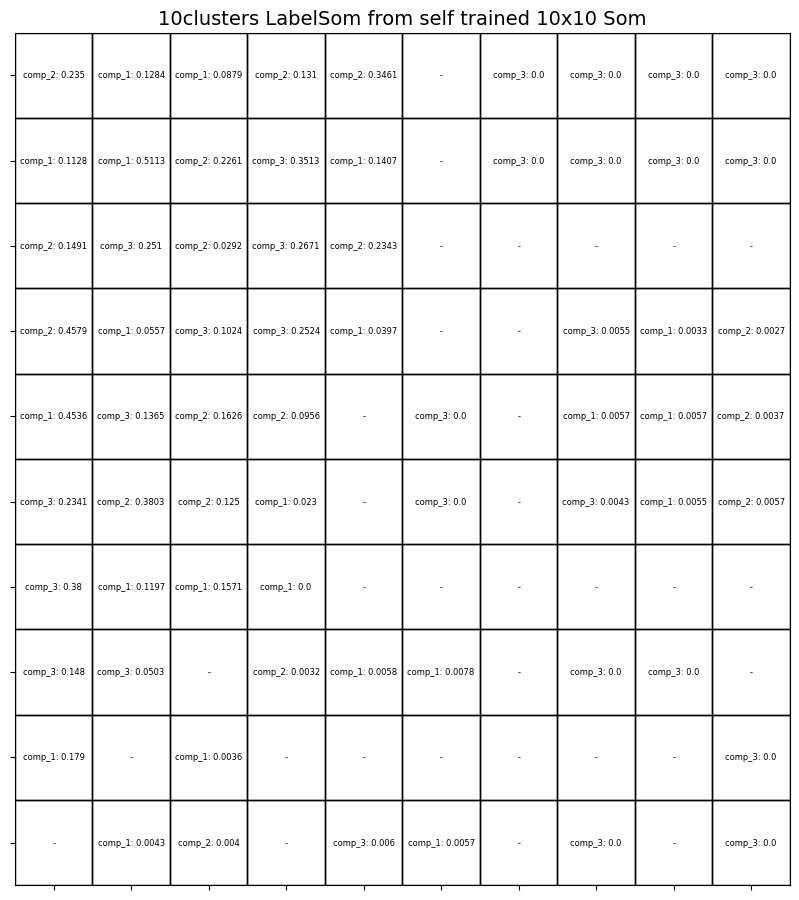

In [1226]:
idata = SOMToolBox_Parse("datasets\\10clusters\\10clusters.vec").read_weight_file()
unnested_list = np.array([item for items in som_10_cluster_10_10._weights for item in items])
(variance,mean,combined) = stringVectors(10, 10, unnested_list, idata['arr'], printValues=True, maxNumLabels=1, label_names=label_names)
printSomLabels(variance, [10, 10], ["10clusters LabelSom from self trained 10x10 Som"],fig_size=[10,12], font_size=6, aspect=1.1)

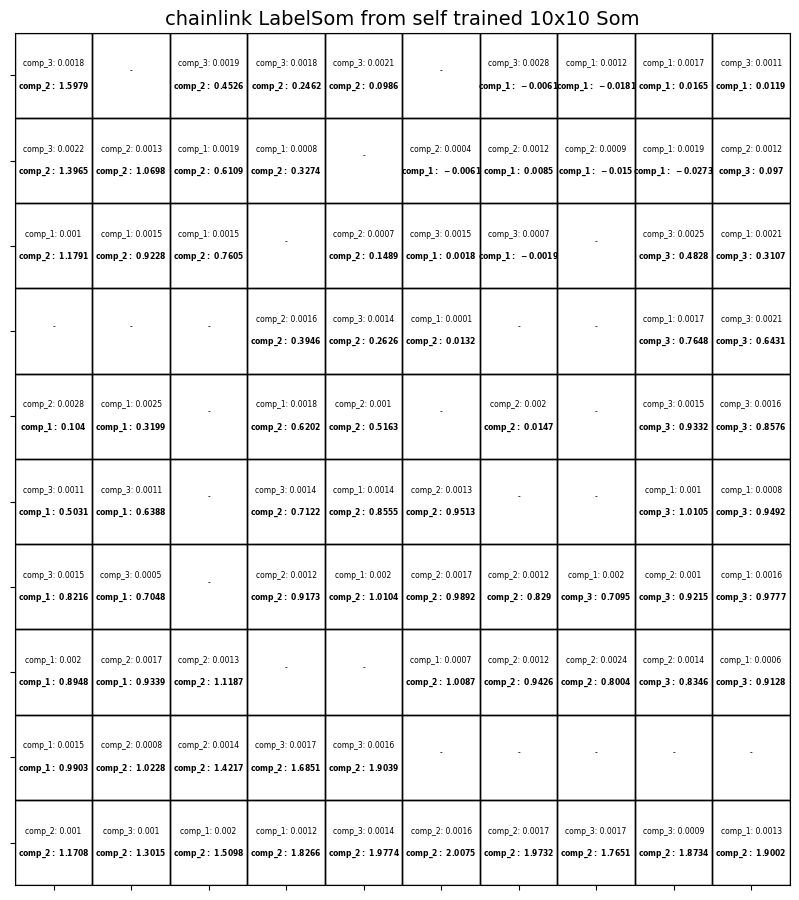

In [1241]:
idata = SOMToolBox_Parse("datasets\\chainlink\\chainlink.vec").read_weight_file()
unnested_list = np.array([item for items in som_chainlink_10_10._weights for item in items])
(variance,mean,combined) = stringVectors(10, 10, unnested_list, idata['arr'], printValues=True, maxNumLabels=1, label_names=label_names)
printSomLabels(variance, [10, 10], ["chainlink LabelSom from self trained 10x10 Som"],fig_size=[10,12], font_size=5.5, aspect=1.1, vector2=mean)